# milestone P2
## Investigating the influence of history on the movies industry
#### Team ADAcADAbra:
DEMIRTAS Enes Eray\
MAILLARD Alexandre Benjamin\
SIRIPATTHITI Punnawat\
ZEMP Manuel Nicolas

## General Information

This notebook presents the way how we prepared the raw data for our analysis. In the first part we import the raw data, in the second part we analyse it for errors and bring the dataframes in an appropriate format which suits our needs. In the third part of the notebook we present the main pipelines for our analysis, which will be performed in the course of milestone P3. 


#### structure of files and directories

- **data/**
  - *character_metadata.tsv*
  - *movie.metadata.tsv*
  - *plot_summaries.txt*
- *P2_data_preparation.ipynb*



Directories are in **bold** and files are in *italic*

#### libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft
import scipy.signal as scisi
import scipy.stats as scist
import json

---

## 1. import data and create dataframes

In [2]:
path = 'data/'

In [3]:
columns_movie = ['Wikipedia movie ID', 'Freebase Movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 
                 'Movie languages', 'Movie countries', 'Movie genres']
movie_df = pd.read_csv(path+'movie.metadata.tsv', sep='\t', names=columns_movie)

In [4]:
columns_character = ['Wikipedia movie ID', 'Freebase Movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender',
                     'Actor height', 'Actor ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID',
                     'Freebase character ID', 'Freebase actor ID']
character_df = pd.read_csv(path+'character.metadata.tsv', sep='\t', names=columns_character)

In [5]:
columns_summaries = ['Wikipedia movie ID','Summary']
summaries_df = pd.read_csv(path+'plot_summaries.txt',sep='\t|\n', names=columns_summaries, engine='python')

### a first glimpse at the data

In [6]:
movie_df

,Wikipedia movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [7]:
character_df

,Wikipedia movie ID,Freebase Movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [8]:
summaries_df

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42301,34808485,"The story is about Reema , a young Muslim scho..."
42302,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42303,35102018,American Luthier focuses on Randy Parsons’ tra...
42304,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


---

## 2. transforming the data to our needs

For our analysis, only some parts of the data are of interest to us. Here we look at the dataframes, check their formats, missing values and errors, rectify them as good as possible and transform the dataframes to our needs. 

#### data of interest to us in frames:
- movie_df
    - wikipedia_ID
    - name of the movie
    - release date
    - movie genres
    - movie languages
    - movie countries
- character_df
    - wikipedia_ID
    - gender of actors
    - age of actors
- summaries_df
    - wikipedia_ID
    - summaries

#### to prepare this data, the following steps have to be performed:

**movie_df:** \
Wikipedia_ID: check if all IDs are present in *plot_summaries>wikipedia_ID*, else filter them out \
movie name: check if existant (else find it through research on the internet) \
release date: check if values are possible, cross check with release date from *character_metadata* \
genre: filter, so that we only have one genre per movie, and group similar genres together

**character_df:** \
Wikipedia_ID: check if all IDs are present in *plot_summaries>wikipedia_ID*, else filter them out \
release date: check if values are possible, cross check with release date from *movie_metadata* \
actor gender: check if values are m/f, transform them into 1: man, 0: woman (if no value put NaN) \
actor age: check if existant (else put NaN)

**summaries_df:** \
check if all data is existant (is there an ID for every summary and vice-versa) \
check if there is for all IDs data in the other dataframes

### 2.1 summaries_df

* the dataframe for summaries does not need to be changed
* delete movies from *movie_df* and *character_df* if their 'Wikipedia movie ID' is not in *summaries_df*

In [9]:
# for movie_df
movie_df = movie_df[movie_df['Wikipedia movie ID'].isin(summaries_df['Wikipedia movie ID'])]

# for movie_df
character_df = character_df[character_df['Wikipedia movie ID'].isin(summaries_df['Wikipedia movie ID'])]

### 2.2 movie_df
#### 2.2.1 initial data cleaning

we detected some errors in the data and erase or replace them:

*  Delete line with missing value 
*  Fix typo of Movie release date 
*  Add a "year" column with only the year of the moive release date 
*  Change the type of certain cell (str to list)

In [10]:
# reject all rows without values in respective column
movie_df = movie_df[movie_df['Movie release date'].notnull()]
movie_df = movie_df[movie_df['Movie name'].notnull()]

# correct detected singular errors in data
movie_df['Movie release date'] = movie_df['Movie release date'].replace(['1010-12-02'],'2010-12-02') #Fix typo

# reset index
movie_df.reset_index(inplace = True,drop = True)

In [11]:
# Add a year column (release year)
movie_df["year"] = movie_df['Movie release date'].apply(lambda x : str(x)[:4]).apply(lambda x : int(x))

In [12]:
# Change the type of the case in the 3 column (str to list)
pd.options.mode.chained_assignment = None

for i in range (0, len(movie_df)):
    res = json.loads(movie_df["Movie genres"][i])
    movie_df["Movie genres"][i] = list(res.values())

for i in range (0, len(movie_df)):
    res = json.loads(movie_df["Movie languages"][i])
    movie_df["Movie languages"][i] = list(res.values())

for i in range (0, len(movie_df)):
    res = json.loads(movie_df["Movie countries"][i])
    movie_df["Movie countries"][i] = list(res.values())

#### 2.2.2 genres

* Create seperate DataFrame for genre analysis
* Delete line with missing genre specification
* Create a dict with all genre and the number of occurence
* Keep only the main genre and delete the genre with only a few occurences (under 200)

In [13]:
movie_genre = movie_df.copy()

In [14]:
# Delete rows (=movies) without genre specifications
for i in range (0, len(movie_genre)):
    if not movie_genre['Movie genres'][i]:
        movie_genre.drop(i, inplace=True)
        
movie_genre.reset_index(inplace = True,drop = True)

In [15]:
# Create a dict with all the different genres and their occurences 
dict_genre = {}
for item in movie_genre["Movie genres"]:
    for value in item: 
        if not value in dict_genre.keys(): 
            dict_genre[value] = 1
        else: 
            dict_genre[value] += 1

print('There are {} different genres'.format(len(dict_genre.keys())))
# print(dict_genre)

There are 363 different genres


In [16]:
# For each line keep only the main genre of the movie 
index = 0
for item in movie_genre["Movie genres"]:
    main = item[0]
    for value in item: 
        if dict_genre.get(value) > dict_genre.get(main):
            main = value
    movie_genre["Movie genres"][index] = main
    index += 1

In [17]:
# Create a dict with only the main genres
dict_main_genres = {}
for item in movie_genre["Movie genres"]:
    if not item in dict_main_genres.keys(): 
        dict_main_genres[item] = 1
    else: 
        dict_main_genres[item] += 1

print('There are {} main genres.'.format(len(dict_main_genres.keys())))

There are 122 main genres.


In [18]:
# Delete all the movies of a genre that has under 200 occurences (to keep only the most frequent genres)
index = 0
for item in movie_genre["Movie genres"]:
    if dict_main_genres[item] < 200:
        movie_genre.drop(index, inplace=True)
    index += 1

movie_genre.reset_index(inplace = True,drop = True)

In [19]:
# Create a dict with only the most frequent main genres
dict_main_genres_2 = {}

for item in movie_genre["Movie genres"]:
    if not item in dict_main_genres_2.keys(): 
        dict_main_genres_2[item] = 1
    else: 
        dict_main_genres_2[item] += 1

print('There are {} most frequent main genres. They are:'.format(len(dict_main_genres_2.keys())))
dict_main_genres_2

There are 17 most frequent main genres. They are:


{'Thriller': 2992,
 'Drama': 18321,
 'World cinema': 543,
 'Comedy': 7017,
 'Romance Film': 781,
 'Action': 1477,
 'Black-and-white': 481,
 'Documentary': 574,
 'Horror': 1707,
 'Short Film': 1007,
 'Comedy film': 364,
 'Family Film': 560,
 'Adventure': 490,
 'Musical': 215,
 'Japanese Movies': 288,
 'Silent film': 258,
 'Crime Fiction': 268}

In [20]:
movie_genre

,Wikipedia movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],Thriller,2001
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],Thriller,1987
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],Drama,1983
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English Language],[South Africa],World cinema,2002
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[English Language],[United States of America],Drama,1997
...,...,...,...,...,...,...,...,...,...,...
37338,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English Language],[United Kingdom],Comedy,1941
37339,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],Drama,2011
37340,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]",Drama,2011
37341,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],Drama,1992


##### first genre analysis
* Plot the occurence of each movie genre by year 
* Plot the ratio of each movie genre by year

In [21]:
# Calculate the ratio of each movie genre by year 
ratio = pd.DataFrame(movie_genre.groupby(["year","Movie genres"])['Movie genres'].count()
                     /movie_genre.groupby(["year"])['Movie genres'].count())
ratio.rename(columns = {'Movie genres':'Movie genres', 'Movie genres':'Ratio'}, inplace = True)
ratio

Ratio
year Movie genres             
1893 Black-and-white  1.000000
1894 Black-and-white  1.000000
1895 Black-and-white  0.714286
     Comedy           0.285714
1896 Black-and-white  0.166667
...                        ...
2013 Horror           0.016393
     Romance Film     0.049180
     Thriller         0.245902
2014 Adventure        0.333333
     Drama            0.666667

[1402 rows x 1 columns]

<AxesSubplot:xlabel='year'>

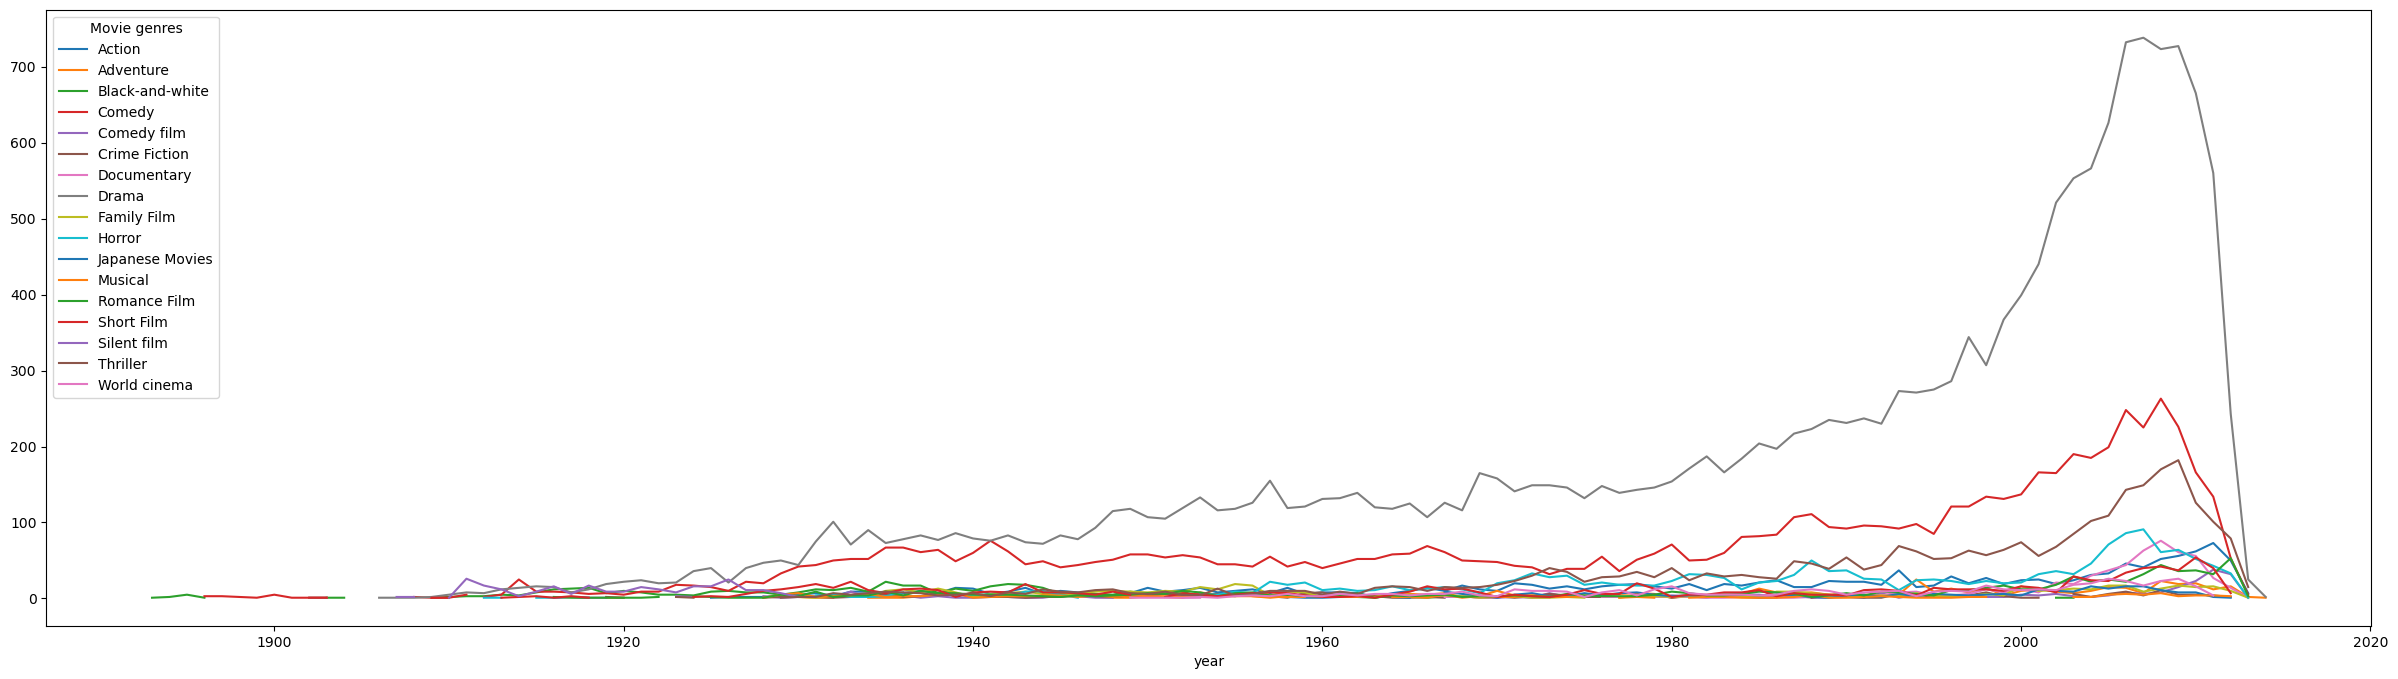

In [22]:
# Plot the occurence of each movie genre by year 
movie_genre.groupby(["year","Movie genres"])["Movie genres"].count().unstack().plot(figsize=(30,8))

<AxesSubplot:xlabel='year'>

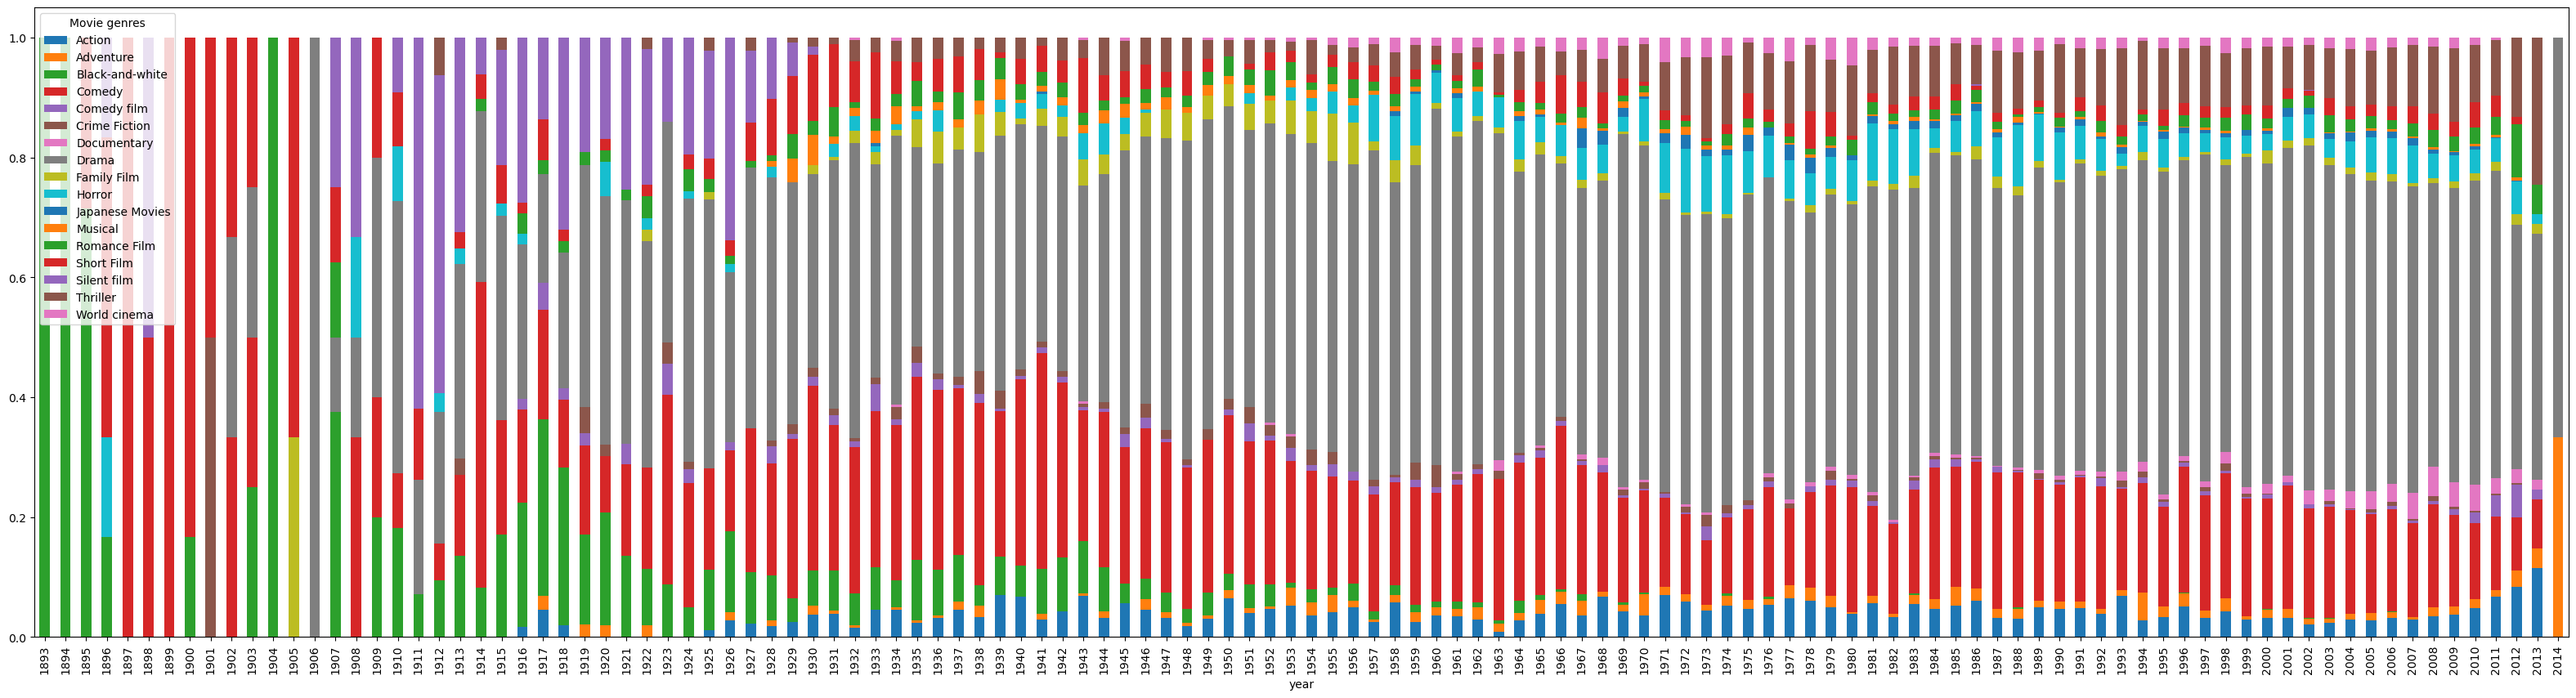

In [23]:
# Plot the ratio of each movie genre by year 
ratio.unstack().plot.bar(y='Ratio',stacked=True,figsize=(40,10))

We are aware that these graphics are not suitable for a presentation (writings are too small etc.), but they serve here only to get a first impression of the data. 

#### 2.2.3 languages
* New DataFrame for language analysis
* Delete line with missing language specification

In [24]:
movie_languages = movie_df.copy()

In [25]:
# Delete movies without language specifications
for i in range (0, len(movie_languages)):
    if not movie_languages['Movie languages'][i]:
        movie_languages.drop(i, inplace=True)

movie_languages.reset_index(inplace = True,drop = True)
movie_languages

,Wikipedia movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English Language],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",2002
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[English Language],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1997
...,...,...,...,...,...,...,...,...,...,...
35643,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",1941
35644,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011
35645,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011
35646,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992


#### 2.2.4 countries
* New DataFrame for countries analysis
* Delete line with missing countries specification

In [26]:
movie_countries = movie_df.copy()

In [27]:
# Delete movies without country specifications
for i in range (0, len(movie_countries)):
    if not movie_countries['Movie countries'][i]:
        movie_countries.drop(i, inplace=True)

movie_countries.reset_index(inplace = True,drop = True)
movie_countries

,Wikipedia movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English Language],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",2002
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[English Language],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1997
...,...,...,...,...,...,...,...,...,...,...
37280,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",1941
37281,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama],2011
37282,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011
37283,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992


### 2.3 character_df

#### 2.3.1 initial data cleaning
we detected some errors in the data and erase or replace them:

*  Delete lines with missing value 
*  Fix typo of Movie release date 
*  Add a "year" column with only the year of the moive release date 

In [28]:
# reject all rows without values in respective column
character_df = character_df[character_df['Actor gender'].notnull()]
character_df = character_df[character_df['Actor age at movie release'].notnull()]

# correct detected singular errors in data
character_df['Movie release date'] = character_df['Movie release date'].replace(['1010-12-02'],'2010-12-02') #Fix typo

# reset index
character_df.reset_index(inplace = True,drop = True)

In [29]:
# Add a year column (release year)
character_df["year"] = character_df['Movie release date'].apply(lambda x : str(x)[:4]).apply(lambda x : int(x))

#### 2.3.2 gender
* check if value existant
* transform into 1: man, 0: woman

In [30]:
print('There are {} null values in the gender column'.format(len(character_df[character_df['Actor gender'].isnull()])))

There are 0 null values in the gender column


In [31]:
character_df['Actor gender']= character_df['Actor gender'].replace(['M','F'],[1,0])
character_df

,Wikipedia movie ID,Freebase Movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,0,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,0,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,1,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,1,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,0,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211438,913762,/m/03pcrp,1992-05-21,Lord Feff,1960-04-28,1,NaN,NaN,Steven Blum,32.0,/m/0kr408g,/m/0kr408l,/m/044_7j,1992
211439,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,1,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz,1992
211440,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,1,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992
211441,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,0,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992


#### 2.3.3 age
* check if there is actor age

In [32]:
print('There are {} null values in the actor age column'.format(len(character_df[character_df['Actor age at movie release'].isnull()])))

There are 0 null values in the actor age column


---

## 3. how to go on

In the first 2 parts we prepared the data for our analysis. Now that it is ready, we introduce a detailed plan about how we will process the data and get the information to tell the data story we are interested in.

### definitions

In our analysis we need the following terms: 

time of impact: \
time span over which we can relate a change in the dataset to the event. The event happens at time x, so over the next few years (x + time of impact) we expect to see changes in the dataset, which we can correlate to the event. 

time of reference: \
time span over which we evaluate the data as a reference to measure changes that might occur due to a event, that happened after the time of reference. 

keywords: \
we define keywords that are charateristic for each event. they represent words and word combinations that uniquely correspond to a topic of an event. With the help of these words we hope to be able to identify the movies which talk about the specific topic that this event is correlated to. 

### general principle of the analysis

The analysis in this project is a little bit different for each event, since we don't always have the same kind of data. In general however, the pipeline is very similar: 

When we look at the summaries, we detect the movies which belong to a certain topic (event). We then transform this information into a number, representing the frequency with which such a movie appears. Then we compare the frequencies of movies of that topic through time, meaning we want to detect changes in the frequency of movies that were created in one time with respect to another time. In order to do this, we use (described in option 2 below) a regression analysis in the time of reference to determine the already existing trends present in the movie industry. Then we calculate the expected values for the time of impact, and perform a hypothesis test comparing the real values to the expected ones. If we can see a statistical difference in the direction that we expected, we can conclude, that the event had indeed an influence on the movie industry.


### concrete pipelines

There are different pipelines for "abrupt changes" and "slow developments":

#### abrupt changes

- clearly define event characteristics: what did the event influence, where could changes occur.
    - primary keywords: words that are unique for this topic and are rarely used in other topics / secondary keywords: words that are relevant for this topic, but are also used frequently in other situations
        - if a movie summary contains a defined number of primary keywords, it’s identified as this kind of movie. 
        - If it contains at least one primary keyword and several secondary keywords, it is also identified as this kind of movie.
        - else it is not classified as a movie of this subject. 
- define time of impact (how many years after the event can there be an influence)
    - optional: vary it and see whether it changes something
- option 1
    - define time of reference
    - define hyptheses, run hypothesis tests
- option 2
    - run a regression analysis for the time before the event, to get the already existing trends and the expected values
    - run a hypothesis test with the expected values and real values in the defined time of impact
- quantify uncertainty


#### slow developments:

- clearly define characteristics of interest: what does the movement influence? where might structural changes occur due to it?
- define time step (for example: within 10 years, what has changed?)
- option 1
    - define hypotheses, run hypothesis tests
- option 2
    - identify trends through a regression analysis
    - run a hypothesis test with the expected values and real values in the defined time of impact
- quantify uncertainty

We will go with the options 2, as they give more precise results and include tha already existing trends of the data.


### Explicit preparation for first analysis

World War II
- expected changes for
    - genres of movies
        - more tragic movies
        - less comedies
    - name of movies (hard to identify since a title only has a few words - maybe leave this out)
        - topic change: more movies about war
    - summaries
        - topic change: more movies about war
            - keywords of a war movie: 
                - primary: war, battle(s), military, army, troops, soldier(s), weapon(s)
                - secondary: conflict(s), fight, enemy, end, attacking, country, countries, violence, death, crisis, world, strategy
        - in general harsher movie plots (more  tragic, hard life, sad, fate)
- identify the set of movies of interest in the time of reference, calculate their frequency (or absolute numbers)
- perform a regression analysis and get the predicted values for the time of impact (about frequency of movies of that type, or about the absolute number)
- null hypothesis: the real values correlate with the expected values, meaning there are no significant changes in the dataset. 
- run hypothesis test (and hopefully reject null hypothesis)


Gender Neutrality
- expected changes (we expect the ideal: equity between men and women)
    - gender partition of actors in a movie is 50:50
    - age (by gender) distribution: normal distribution expected
        - evaluate these for different genres
    - summaries
        - no gender-offending scenes or language
        - option 1
            - detect movies with a combination of keywords that suppose offending scenes (frequency or absolute values) in reference time and time of impact
        - option 2
            - train with ML for detecting offending scenes -> need a training dataset!!
            - run algorithm on dataset and identify these movies (frequency or absolute values) in reference time and time of impact
- define interval of progression (for example every 20 years we expect to see a development). then the time of reference are the first x years, the time of impact are the next x years for the first iteration. in the second iteration the first time of impact becomes the time of reference and the x years after it become the time of impact. and so on
- repeat for each time step:
    - run regression analysis for reference time
    - predict values for time of impact (frequency or absolute values)
    - null hypothesis: the real values correlate with the expected values
    - run hypothesis test (and hopefully reject null hypothesis)